## Features scaling 的注意点
- 仅对 Features 做 scaling, 不要应用在全为 1 的第一列上，也不要应用在 y 上面。
- 当回归完成后，在做预测时，需要对 X 的特征做同样的处理，然后就可以预测出相应的值了。

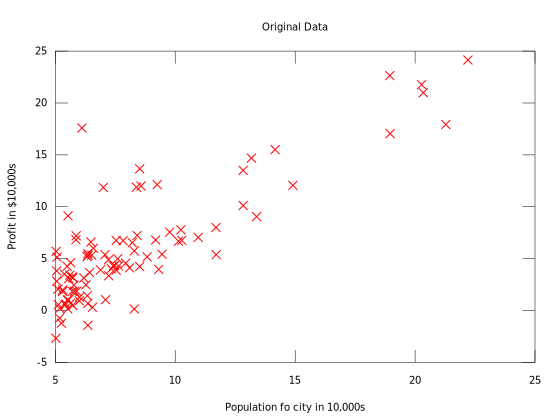

In [73]:
data = load('ex1data1.txt');
x = data(:, 1);
y = data(:, 2);
plot(x, y, 'rx', 'MarkerSize', 3)
xlabel('Population fo city in 10,000s');
ylabel('Profit in $10,000s');
title('Original Data')

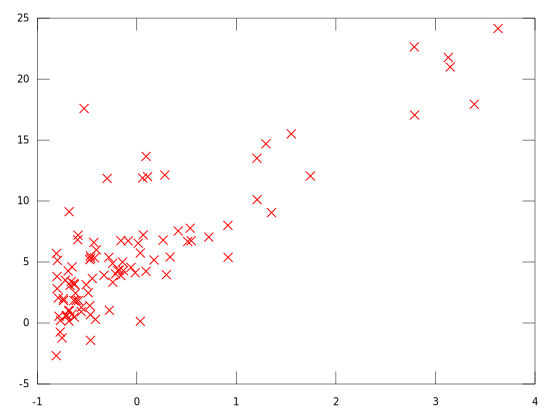

In [74]:
% 很明显进行 feature scaling 不会改变图形的。
u = mean(data);
sig = std(data);
x = (data(:, 1) - u(1)) / sig(1);
% y = (data(:, 2) - u(2)) / sig(2); % 注意在features scaling 就是 features scaling 不在用在 y 或 theta 上。 
plot(x, y, 'rx', 'MarkerSize', 3);

In [75]:
% compute cost function
function J = computeCost(X, y, theta)
    m = length(y);
    diff = X * theta - y;
    J = diff' * diff / (2 * m);
end
    
% gradient descent with feature normalization.
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
    m = length(y);
    J_history = zeros(m, 1);
    
    % update theta
    for i = 1:num_iters
        diff = X * theta - y;
        theta = theta - alpha * X' * diff / m;
        J_history(i) = computeCost(X, y, theta);
    end
end

In [76]:
m = length(y);
X = [ones(m, 1), x];
alpha = 0.01;
num_iters = 1500;
theta = zeros(2, 1);
[theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters);
theta
J_history(1:4)

theta =

   5.8391
   4.6169

ans =

   31.526
   30.990
   30.464
   29.949



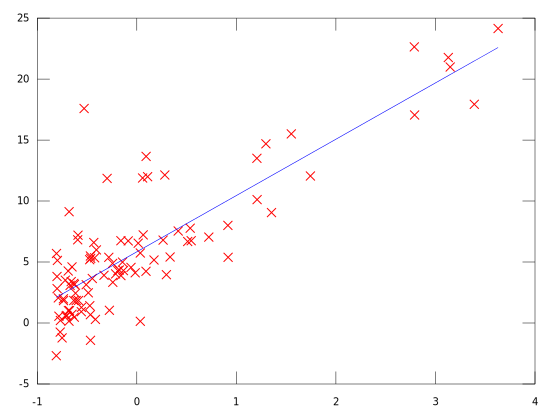

In [77]:
plot(x, y, 'rx', 'MarkerSize', 3);
hold on;
plot(x, X * theta, '-');

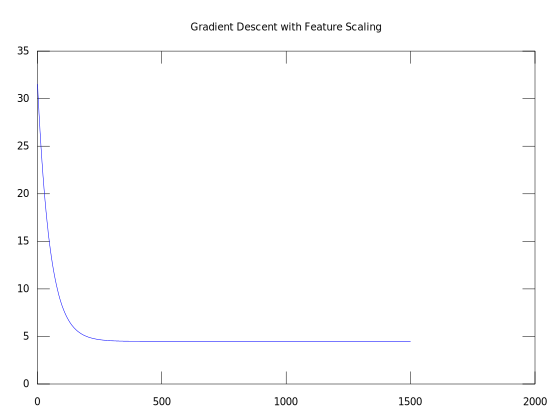

In [78]:
% plog cost function
plot(1:1500, J_history)
title('Gradient Descent with Feature Scaling')

可以看出通过 Features scaling 我们可以 speed up 收敛速度。

### Plotting J(θ)

In [79]:
theta0_vals = linspace(-5, 5, 100);
theta1_vals = linspace(-5, 5, 100);
J_vals = zeros(100, 100);

for i = 1:100
    for j = 1:100
        t = [theta0_vals(i); theta1_vals(j)];
        J_vals(i, j) = computeCost(X, y, t);
    end
end    

In [80]:
% 可以看来我们 convex function 变更更加容易求得。
figure
surf(theta0_vals, theta1_vals, J_vals)

figure
surf(theta0_vals, theta1_vals, J_vals')

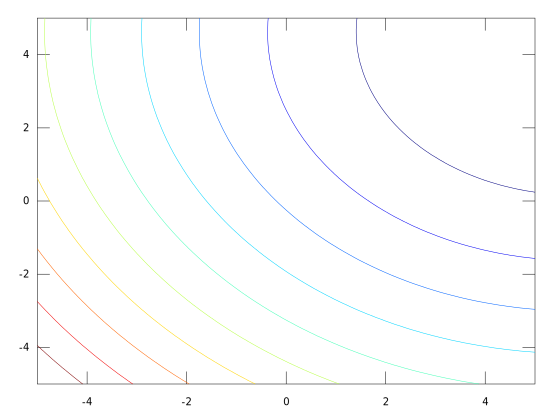

In [81]:
figure
contour(theta0_vals, theta1_vals, J_vals');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 3);

与 `OneFeatureLR` 对比，真正的完美。

In [82]:
% 预测
u
theta
computeCost(X, y, theta)
x1 = [1, 3.5];
x2 = [1, 7];
x1(2) = (x1(2) - u(1))/sig(1)
x2(2) = (x2(2) - u(1))/sig(1)

predict1 = (x1 * theta);
predict2 = (x2 * theta);
printf('For population = 35,000, we predict a profit of %f\n', predict1 * 10000);
printf('For population = 70,000, we predict a profit of %f\n', predict2 * 10000);


u =

   8.1598   5.8391

theta =

   5.8391
   4.6169

ans =  4.4770
x1 =

   1.0000  -1.2041

x2 =

   1.00000  -0.29970

For population = 35,000, we predict a profit of 2798.370636
For population = 70,000, we predict a profit of 44554.534336
